In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',-1)

In [3]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [5]:
data = pd.read_csv('archive/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
#Data Dictionary
dictionary = pd.read_csv('archive/data-dictionary.csv')
dictionary.head(len(dictionary))

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [7]:
data.shape

(167, 10)

In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# DATA CLEANING

In [9]:
#Null Percentage:columns
(data.isnull().sum() *100 / len(data)).value_counts(ascending =False)

0.0    10
dtype: int64

In [10]:
#Null count:Rows
data.isnull().sum(axis=1).value_counts(ascending=False)

0    167
dtype: int64

no missing values

# Exploratory Data Analysis 

# Univariate Analysis

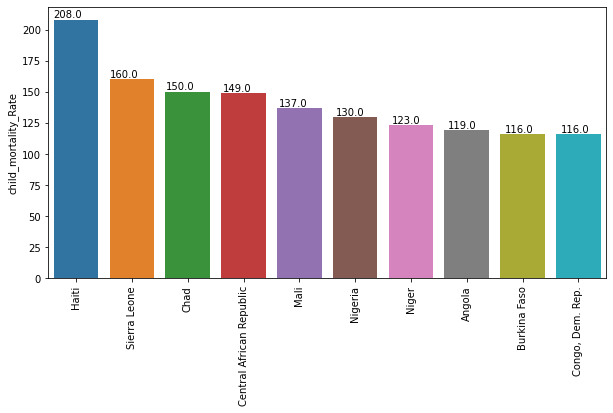

In [11]:
#Child mortality rate:Death of children under 5 years of age per 1000 live births
plt.figure(figsize=(10,5))
child_mort_top10 = data[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
ax=sns.barplot(x='country',y='child_mort',data=child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() *1.01))
ax.set(xlabel='',ylabel='child_mortality_Rate')
plt.xticks(rotation=90)
plt.show()

#Top 10 Countries having highest Child Mortality Rate are present in Africa having poor healthcare facilities.

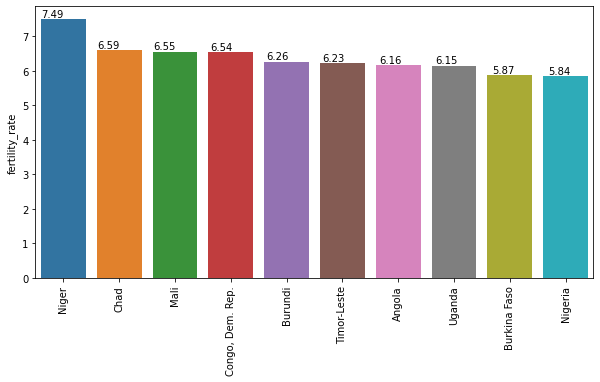

In [12]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize=(10,5))
total_fert_top10 = data[['country','total_fer']].sort_values('total_fer',ascending=False).head(10)
ax = sns.barplot(x='country',y='total_fer',data=total_fert_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel ='',ylabel ='fertility_rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Fertility Rate are places where people are poorest in all.

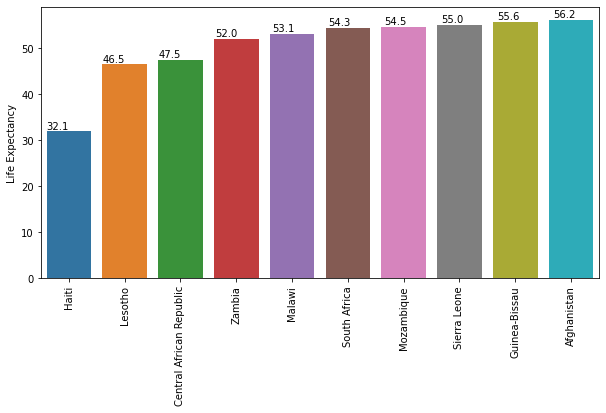

In [13]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize=(10,5))
life_expec = data[['country','life_expec']].sort_values('life_expec',ascending=True).head(10)
ax = sns.barplot(x='country',y='life_expec',data=life_expec)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01 ))
ax.set(xlabel='',ylabel='Life Expectancy')
plt.xticks(rotation=90)
plt.show()


Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

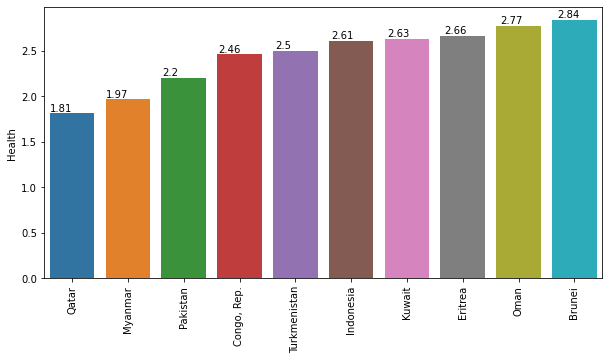

In [14]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize=(10,5))
health = data[['country','health']].sort_values('health',ascending='True').head(10)
ax= sns.barplot(x='country',y='health',data=health)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() *1.01))
    
ax.set(xlabel='',ylabel='Health')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest health spending are mix bag of countries where per Capita income is very high or involved in unrest activities.

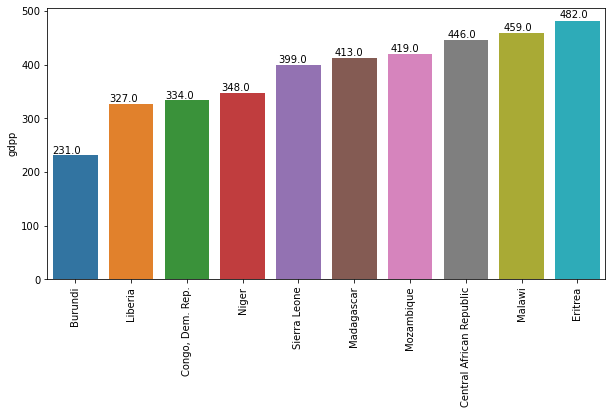

In [15]:
## The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize=(10,5))
gdp = data[['country','gdpp']].sort_values('gdpp',ascending='True').head(10)
ax=sns.barplot(x='country',y='gdpp',data=gdp)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() * 1.01 ,p.get_height() * 1.01 ))
    
ax.set(xlabel='',ylabel='gdpp')
plt.xticks(rotation=90)
plt.show()


Top 10 Countries having lowest GDP per capita are from East Africa

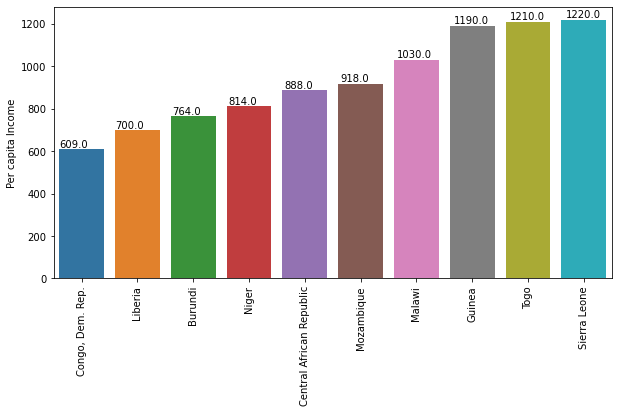

In [16]:
# Per capita Income : Net income per person

plt.figure(figsize = (10,5))
income_bottom10 = data[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Per capita Income are from East Africa

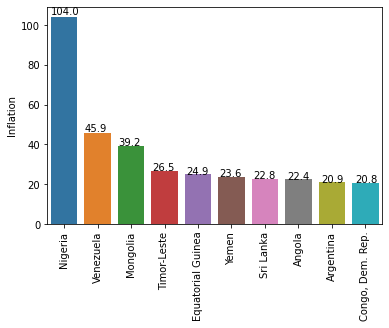

In [17]:
# Inflation: The measurement of the annual growth rateplt.figure(figsize = (10,5))
inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show() 


Top 10 Countries having highest Inflation are from countries where there is social / political unrest in progress

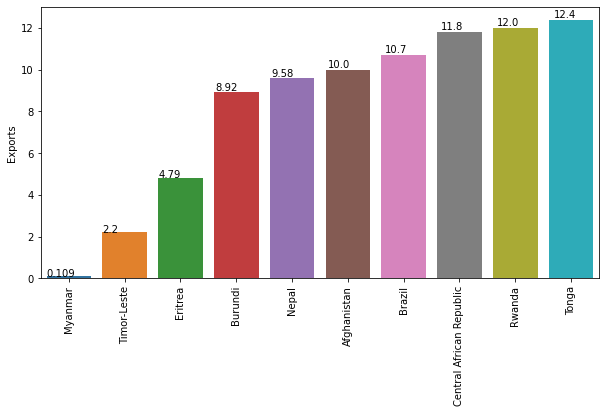

In [18]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (10,5))
exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Exports are from mostly from underdeveloped / developing countries

# lowest 5 countries for each factor

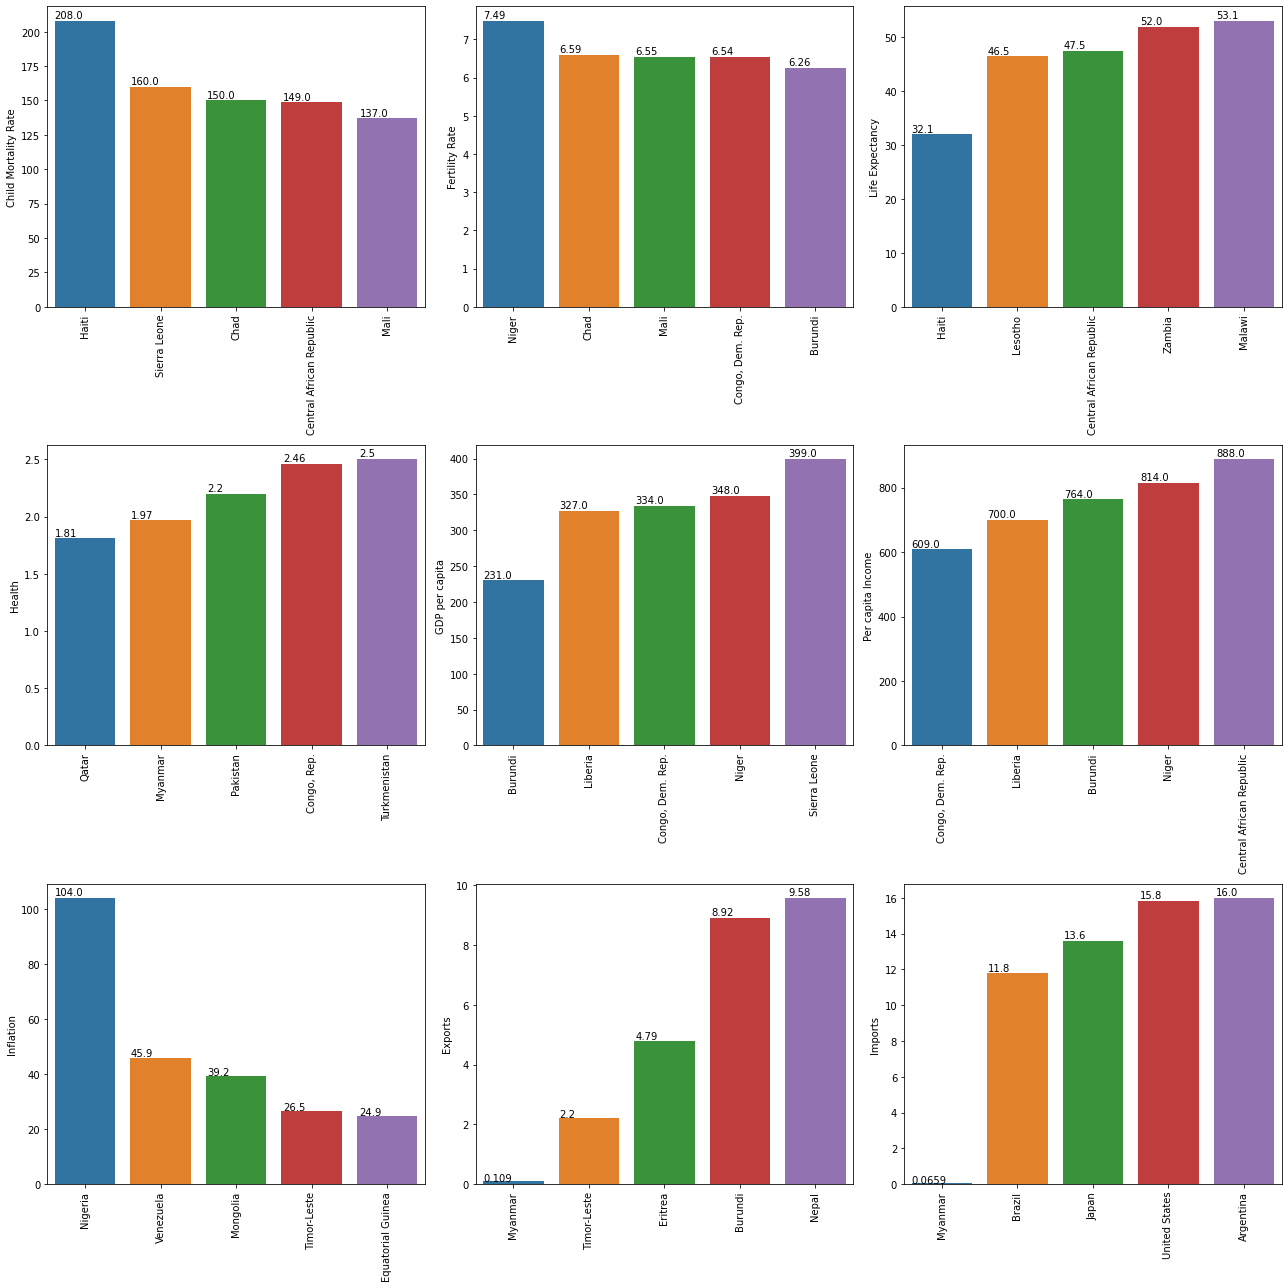

In [19]:
fig ,axs = plt.subplots(3,3,figsize =(18,18))


# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = data[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = data[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = data[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = data[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()


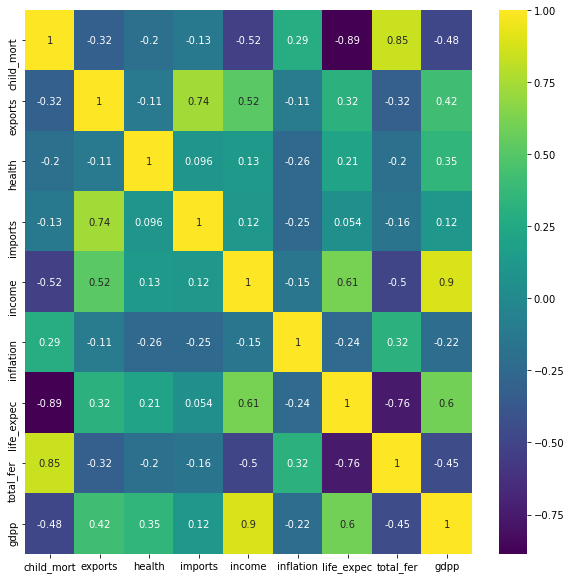

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.savefig('Correlation')
plt.show()


>child_mortality and life_expentency are highly correlated with correlation of -0.89

>child_mortality and total_fertility are highly correlated with correlation of 0.85

>imports and exports are highly correlated with correlation of 0.74

>life_expentency and total_fertility are highly correlated with correlation of -0.76

<function matplotlib.pyplot.show(*args, **kw)>

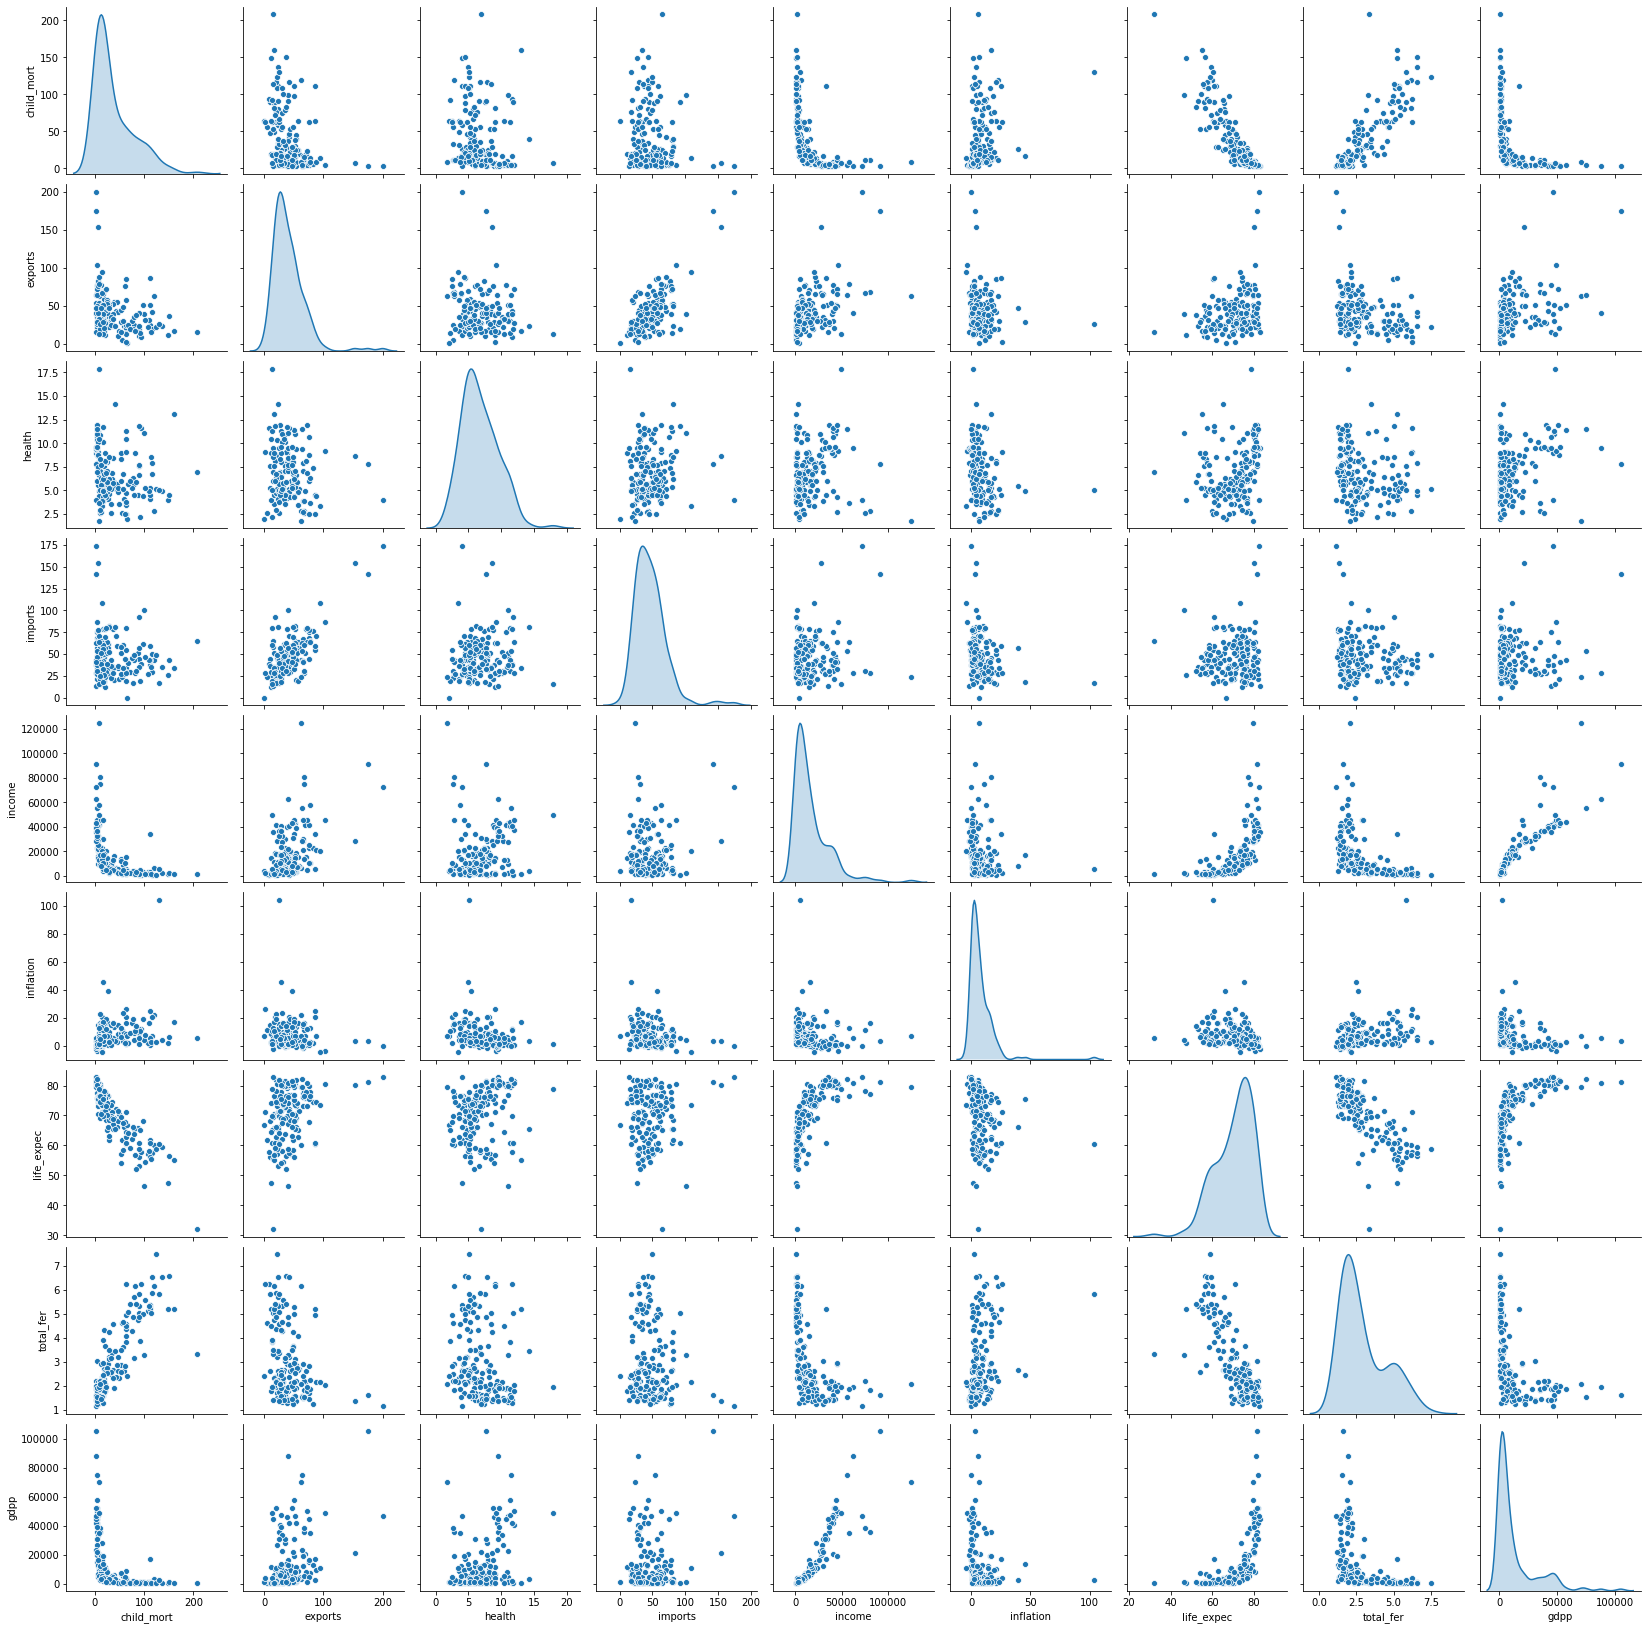

In [21]:
sns.pairplot(data,corner=False,diag_kind="kde")
plt.show

# DATA PREPARATION

# Derived Metrices

converting imports,exports and health from percentages to actual relative values to their GDP per capita to get a clear picture

In [22]:
data['exports'] = data['exports'] * data['gdpp']/100
data['imports'] = data['imports'] * data['gdpp']/100
data['health']  = data['health']  * data['gdpp']/100

In [23]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [24]:
data_pop = data.copy()
country = data_pop.pop('country')

In [25]:
data_pop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Rescaling the Features

In [26]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(data_pop)

In [27]:
data_scale

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# DIMENSION REDUCTIONALITY(PCA)

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.



In [28]:
pca = PCA(svd_solver = 'randomized' ,random_state=50)

In [29]:
pca.fit(data_scale)

PCA(random_state=50, svd_solver='randomized')

In [30]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [31]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

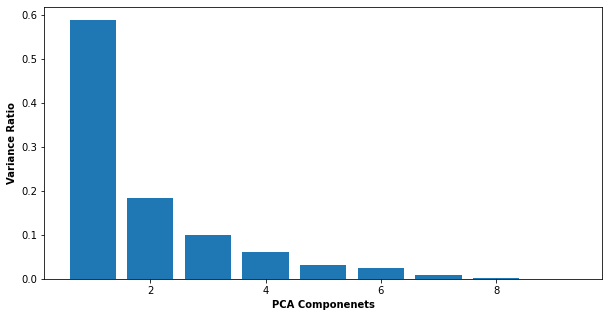

In [32]:
#variance ratio bar plot for each PCA components

plt.figure(figsize=(10,5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_) + 1),pca.explained_variance_ratio_)
plt.xlabel('PCA Componenets',fontweight='bold')
plt.ylabel('Variance Ratio',fontweight='bold')
plt.show()

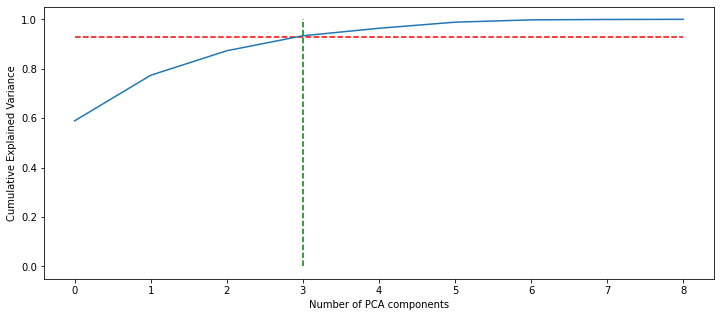

In [33]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3,ymax=1,ymin=0,colors='g',linestyle='--')
plt.hlines(y=0.93,xmax=8,xmin=0,colors='r',linestyles='--')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

It is evident from the above Scree plot that more than 90% variance is explained by the first 3 principal components. Hence, we will use these components only going forward for Clustering process.

In [34]:
org_col = list(data.drop(['country'],axis=1).columns)
org_col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [35]:
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [36]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


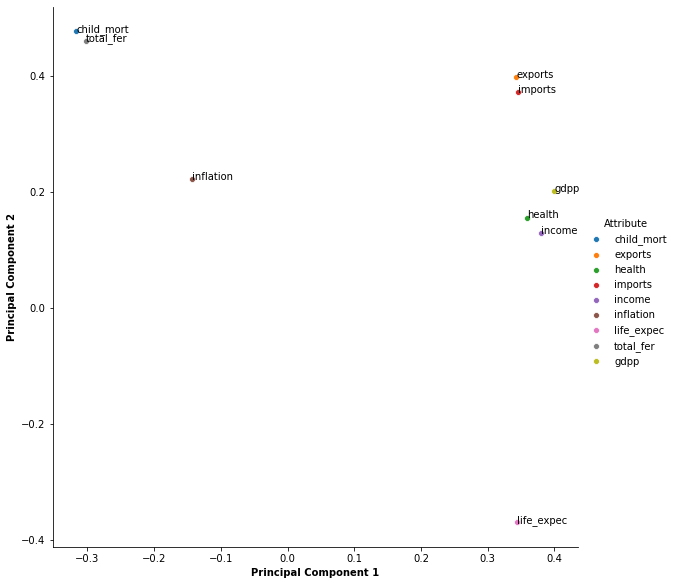

In [37]:
# Plotting the above dataframe for better visualization with PC1 and PC2
sns.pairplot(data =attributes_pca ,x_vars =["PC_1"], y_vars=["PC_2"],hue='Attribute',height=8)
plt.xlabel("Principal Component 1",fontweight='bold')
plt.ylabel("Principal Component 2",fontweight='bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt,(attributes_pca.PC_1[i],attributes_pca.PC_2[i]))
    

Since 90% variance is explained by 3 principal components, lets build the dataframe using those 3 components only.

In [38]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

In [39]:
inc_pca

IncrementalPCA(n_components=3)

In [40]:
# Fitting the scaled df on incremental pca
df_inc_pca = inc_pca.fit_transform(data_scale)
df_inc_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [41]:
# Creating new dataframe with Principal components

df_pca = pd.DataFrame(df_inc_pca,columns=['PC_1','PC_2','PC_3'])
df_pca_final=pd.concat([country,df_pca],axis=1)
df_pca_final.head()


,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


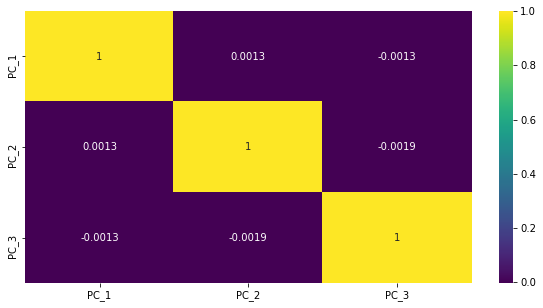

In [42]:
# Plotting Heatmap to check is there still dependency in the dataset.
plt.figure(figsize=(10,5))
ax=sns.heatmap(df_pca_final.corr(),annot=True,cmap='viridis')

As we can see from above heatmap that the correlation among the attributes is almost 0, we can proceed with this dataframe.

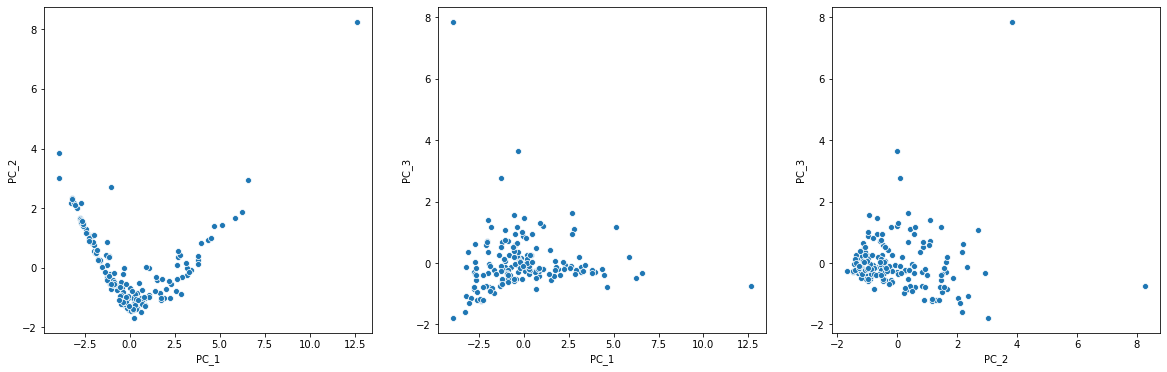

In [43]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(data = df_pca_final , x='PC_1' ,y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data = df_pca_final, x='PC_1' ,y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data = df_pca_final , x= 'PC_2' ,y='PC_3')
plt.show()

# OUTLIER ANALYSIS

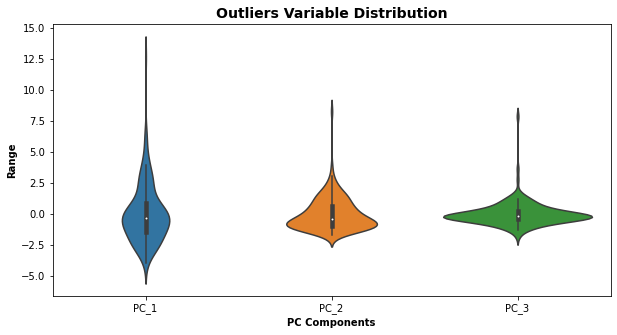

In [44]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,5]
sns.violinplot(data = df_pca_final[outliers])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [45]:
Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

In [46]:
# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

In [47]:
# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

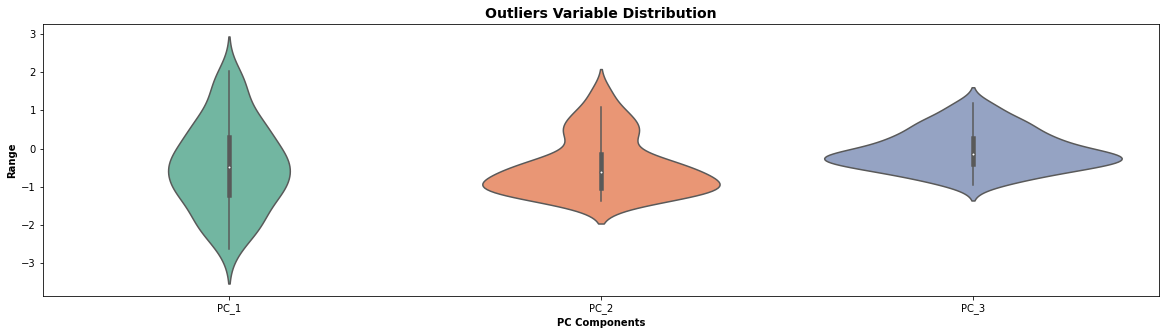

In [48]:
# Plot after Outlier removal 

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [20,5]
sns.violinplot(data = df_pca_final[outliers], orient="v", palette="Set2" )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [49]:
# Reindexing the df after outlier removal

df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,-0.467515,-0.493492,0.603288


# Hopkins Statistical Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [50]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist,_ = nbrs.kneighbors(uniform(np.amin(X,axis = 0),np.amax(X,axis=0),d).reshape(1, -1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist,_ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1 ,-1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd,wjd)
        HS = 0
        
    return HS

In [51]:
Hopkins_score = round(hopkins(df_pca_final_data) , 2)

In [52]:
print("{} is a good Hopkins score for clustering.".format(Hopkins_score))

0.8 is a good Hopkins score for clustering.


# MODEL BUILDING


# K -Means_Clustering

# Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters

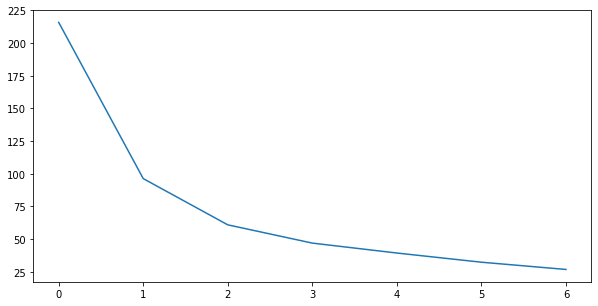

In [53]:
plt.figure(figsize=(10,5))
wsd = []
for num_clusters in list(range(1,8)):
    model_cluster = KMeans(n_clusters = num_clusters , max_iter = 150,random_state = 50 )
    model_cluster.fit(df_pca_final_data)
    wsd.append(model_cluster.inertia_)
    
plt.plot(wsd);

# SILHOUETTE ANALYSIS

silhouette score=(p−q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [54]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2 , 4, 5, 6 ,7 ,8 ]

for num_clusters in range_n_clusters:
    
    kmeans  = KMeans(n_clusters = num_clusters ,max_iter = 50 ,random_state=60)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score
    
    silhouette_avg = silhouette_score(df_pca_final_data , cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4538143392730944
For n_clusters=4, the silhouette score is 0.3589597287484392
For n_clusters=5, the silhouette score is 0.35974877281022166
For n_clusters=6, the silhouette score is 0.3542266474551972
For n_clusters=7, the silhouette score is 0.3684257545283754
For n_clusters=8, the silhouette score is 0.36392956305007035


In [55]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster4.fit(df_pca_final_data)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [56]:
cluster4.labels_

array([1, 0, 3, 0, 0, 3, 3, 2, 3, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 1, 3, 3, 0, 0, 2, 0, 1, 3, 2, 1, 1, 0, 1, 3, 0, 2, 2, 3, 2,
       2, 0, 2, 3, 0, 0, 0, 1, 2, 1, 3, 1, 0, 3, 1, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 2, 3, 1, 0, 0, 0, 2, 3, 3, 0, 0, 1, 2, 1, 3, 3, 3, 2, 2, 3,
       0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1], dtype=int32)

In [57]:
np.unique(cluster4.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([39, 21, 25, 19]))

In [58]:
df_pca_final['Cluster_Id4'] = cluster4.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id4
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Algeria,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Azerbaijan,-0.467515,-0.493492,0.603288,0


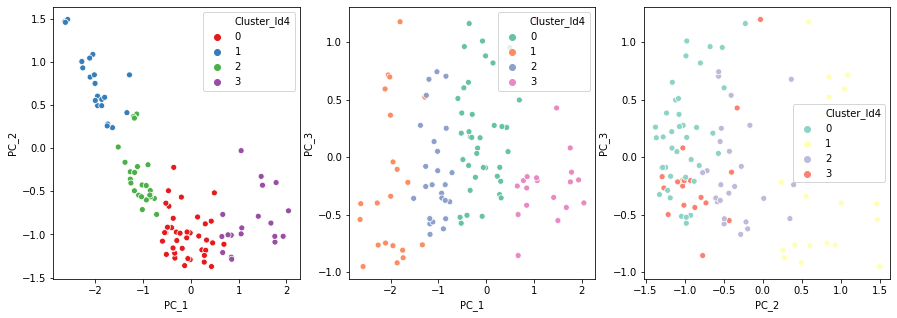

In [59]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set2",data=df_pca_final,ax=axes[1])
sns.scatterplot(x='PC_2',y='PC_3',hue='Cluster_Id4',legend='full',palette='Set3',data=df_pca_final,ax=axes[2])
plt.show()

In plot 1, it seems lot of intra-distance between the cluster elements, which is not a good sign.

In [60]:
# Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.

df_pca_final = df_pca_final.drop('Cluster_Id4',axis=1)

In [61]:
#K-means with k=5 clusters

cluster5 = KMeans(n_clusters=5, max_iter=120,random_state=70)
cluster5.fit(df_pca_final_data)

KMeans(max_iter=120, n_clusters=5, random_state=70)

In [62]:
# Cluster labels

cluster5.labels_

array([4, 1, 3, 1, 1, 3, 3, 2, 3, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 4,
       0, 1, 4, 3, 3, 1, 1, 2, 1, 4, 3, 2, 0, 4, 1, 0, 3, 1, 2, 2, 3, 2,
       2, 1, 0, 3, 1, 1, 1, 4, 2, 4, 3, 4, 1, 3, 4, 1, 1, 0, 1, 2, 1, 1,
       2, 4, 2, 3, 4, 1, 1, 1, 2, 3, 3, 1, 1, 4, 2, 4, 3, 3, 3, 2, 2, 3,
       1, 0, 1, 2, 4, 2, 1, 1, 2, 4, 1, 1, 2, 2, 1, 0], dtype=int32)

In [63]:
# assign the label

df_pca_final['Cluster_Id'] = cluster5.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,4
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Azerbaijan,-0.467515,-0.493492,0.603288,1


In [64]:
np.unique(cluster5.labels_,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 7, 39, 24, 19, 15]))

In [65]:
# Number of countries in each cluster

df_pca_final['Cluster_Id'].value_counts()

1    39
2    24
3    19
4    15
0    7 
Name: Cluster_Id, dtype: int64

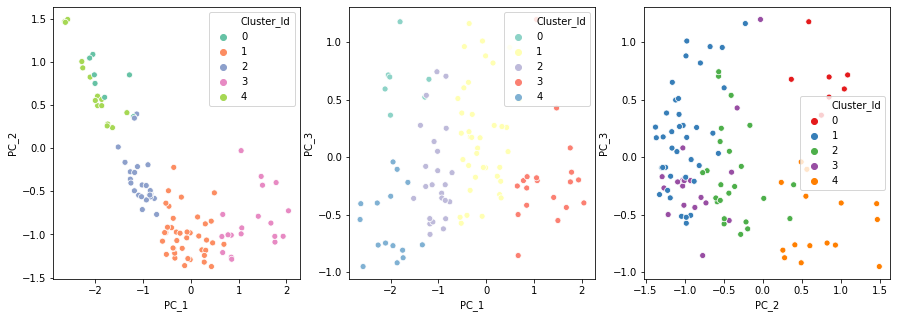

In [66]:
# Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set2",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set3",data=df_pca_final,ax=axes[1])
sns.scatterplot(x='PC_2',y='PC_3',hue='Cluster_Id',legend='full',palette='Set1',data=df_pca_final,ax=axes[2])
plt.show()

We have visualized the data on the principal components and saw some good clusters were formed but some were not so good hence let's now visualize the data on the original attributes.

In [67]:
df_merge = pd.merge(data , df_pca_final , on = 'country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]


In [68]:
# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

In [69]:
#cluster_child

In [70]:
df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,67.085714,1547.557143,961.131429,147.828571,6788.571429,18.942857,64.957143,4.627143,3041.428571
1,1,18.587179,2539.506667,2586.483333,404.907641,12608.205128,7.463103,74.087179,2.144359,6309.743590
2,2,40.200000,936.850772,1210.086296,155.953100,5563.750000,7.336667,67.112500,3.026667,2549.250000
3,3,7.315789,9455.836842,9431.278947,1363.778947,25710.526316,1.717421,76.652632,1.759474,18210.526316
4,4,76.593333,326.438920,479.478400,61.558773,2482.666667,6.594667,61.493333,4.793333,1034.866667


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

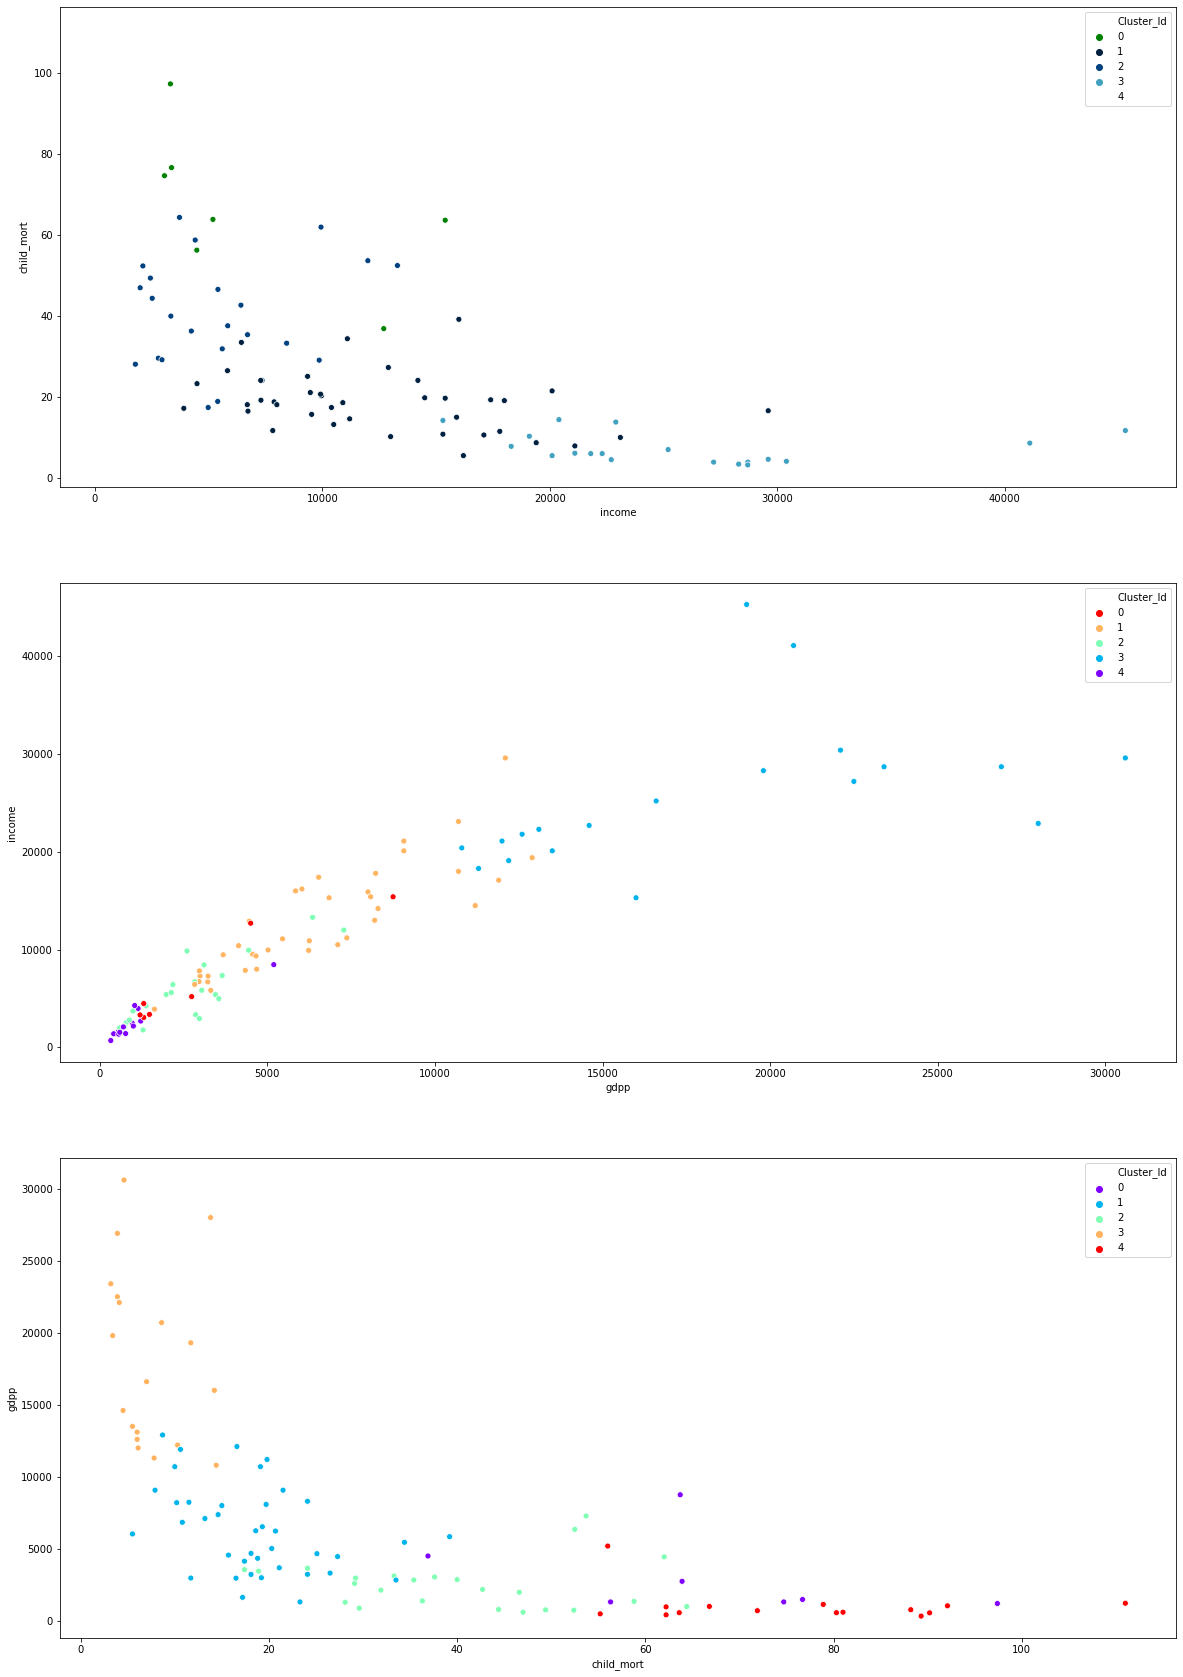

In [71]:

plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="ocean")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="rainbow_r")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="rainbow")
plt.show()

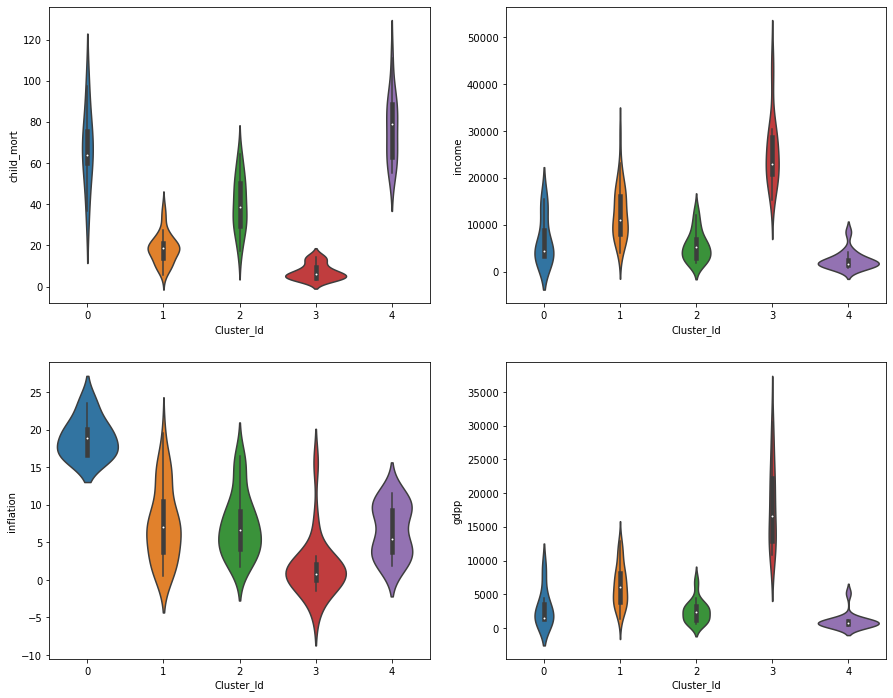

In [72]:

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])
plt.show()

Child Mortality is highest for Cluster 0 and Cluster 4.These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0 and 4. Hence, these countries need some help.

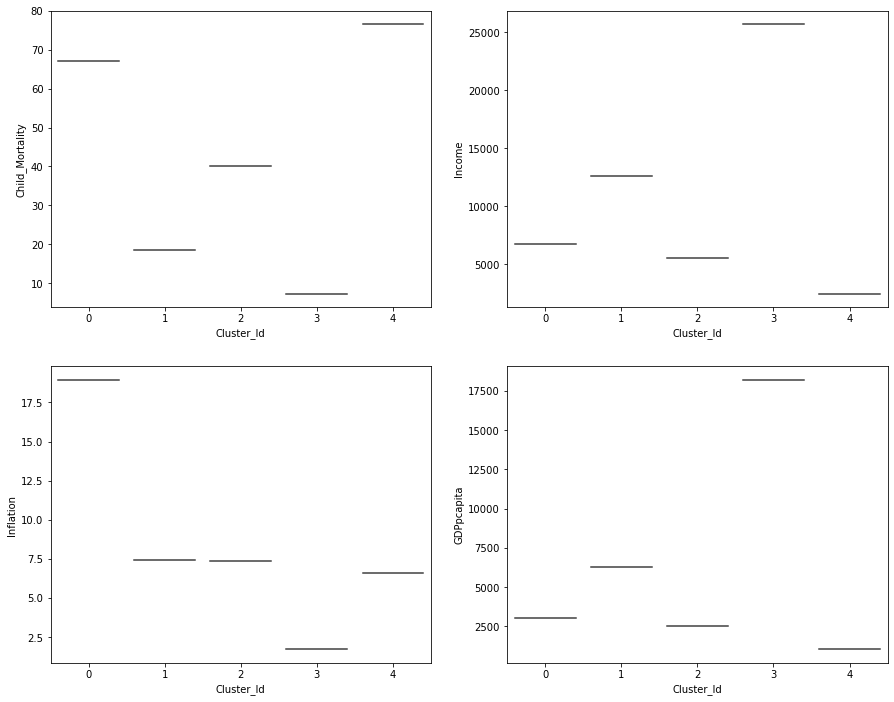

In [73]:
# Violin plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])
plt.show()

The mean values depict same as above

In [74]:
# List of countries in Cluster 0

df_merge_col[df_merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
22,"Congo, Rep.",63.9,2331.74,1498.78,67.404,5190,20.7,60.4,4.95,2740,0
34,Gabon,63.7,5048.75,1653.75,306.250,15400,16.6,62.9,4.08,8750,0
37,Ghana,74.7,386.45,601.29,68.382,3060,16.6,62.2,4.27,1310,0
46,Iraq,36.9,1773.00,1534.50,378.450,12700,16.6,67.2,4.56,4500,0
61,Mauritania,97.4,608.40,734.40,52.920,3320,18.9,68.2,4.98,1200,0
89,Sudan,76.7,291.56,254.56,93.536,3370,19.6,66.3,4.88,1480,0
103,Yemen,56.3,393.00,450.64,67.858,4480,23.6,67.5,4.67,1310,0


# HIERARCHICAL CLUSTERING

In [75]:
df_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,-0.467515,-0.493492,0.603288


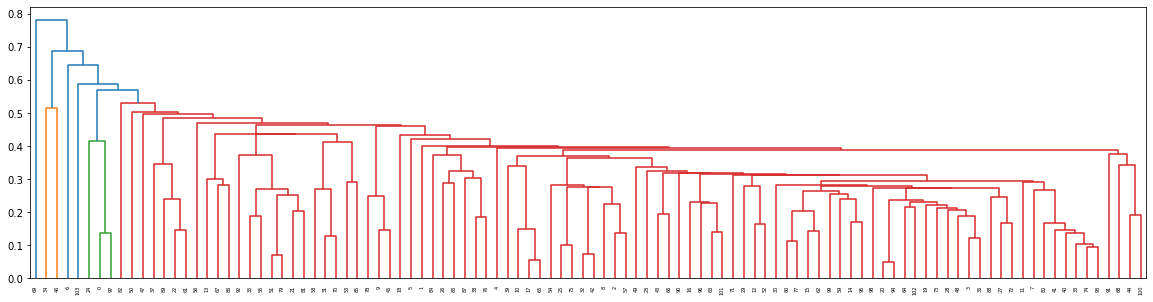

In [76]:
# Single linkage

mergings = linkage(df_pca_final_data, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

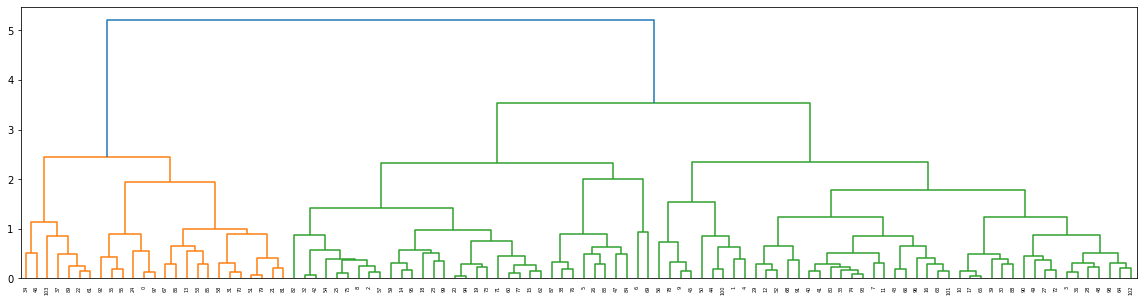

In [77]:
# Complete Linkage

mergings = linkage(df_pca_final_data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [78]:
df_pca_hc = df_pca_final.copy()
df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)
df_pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Azerbaijan,-0.467515,-0.493492,0.603288


In [79]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']

In [80]:
df_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Azerbaijan,-0.467515,-0.493492,0.603288,1


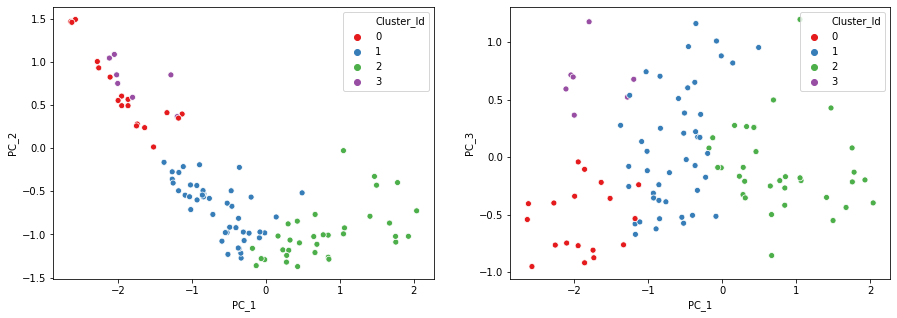

In [81]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])
plt.show()

Cluster 4 seems to be not properly formed in Plot 1.

In [82]:

df_merge_hc = pd.merge(data,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]


In [83]:
df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,4
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,3
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1
4,Azerbaijan,39.2,3171.12,1208.880,343.3920,16000,13.80,69.1,1.92,5840,1


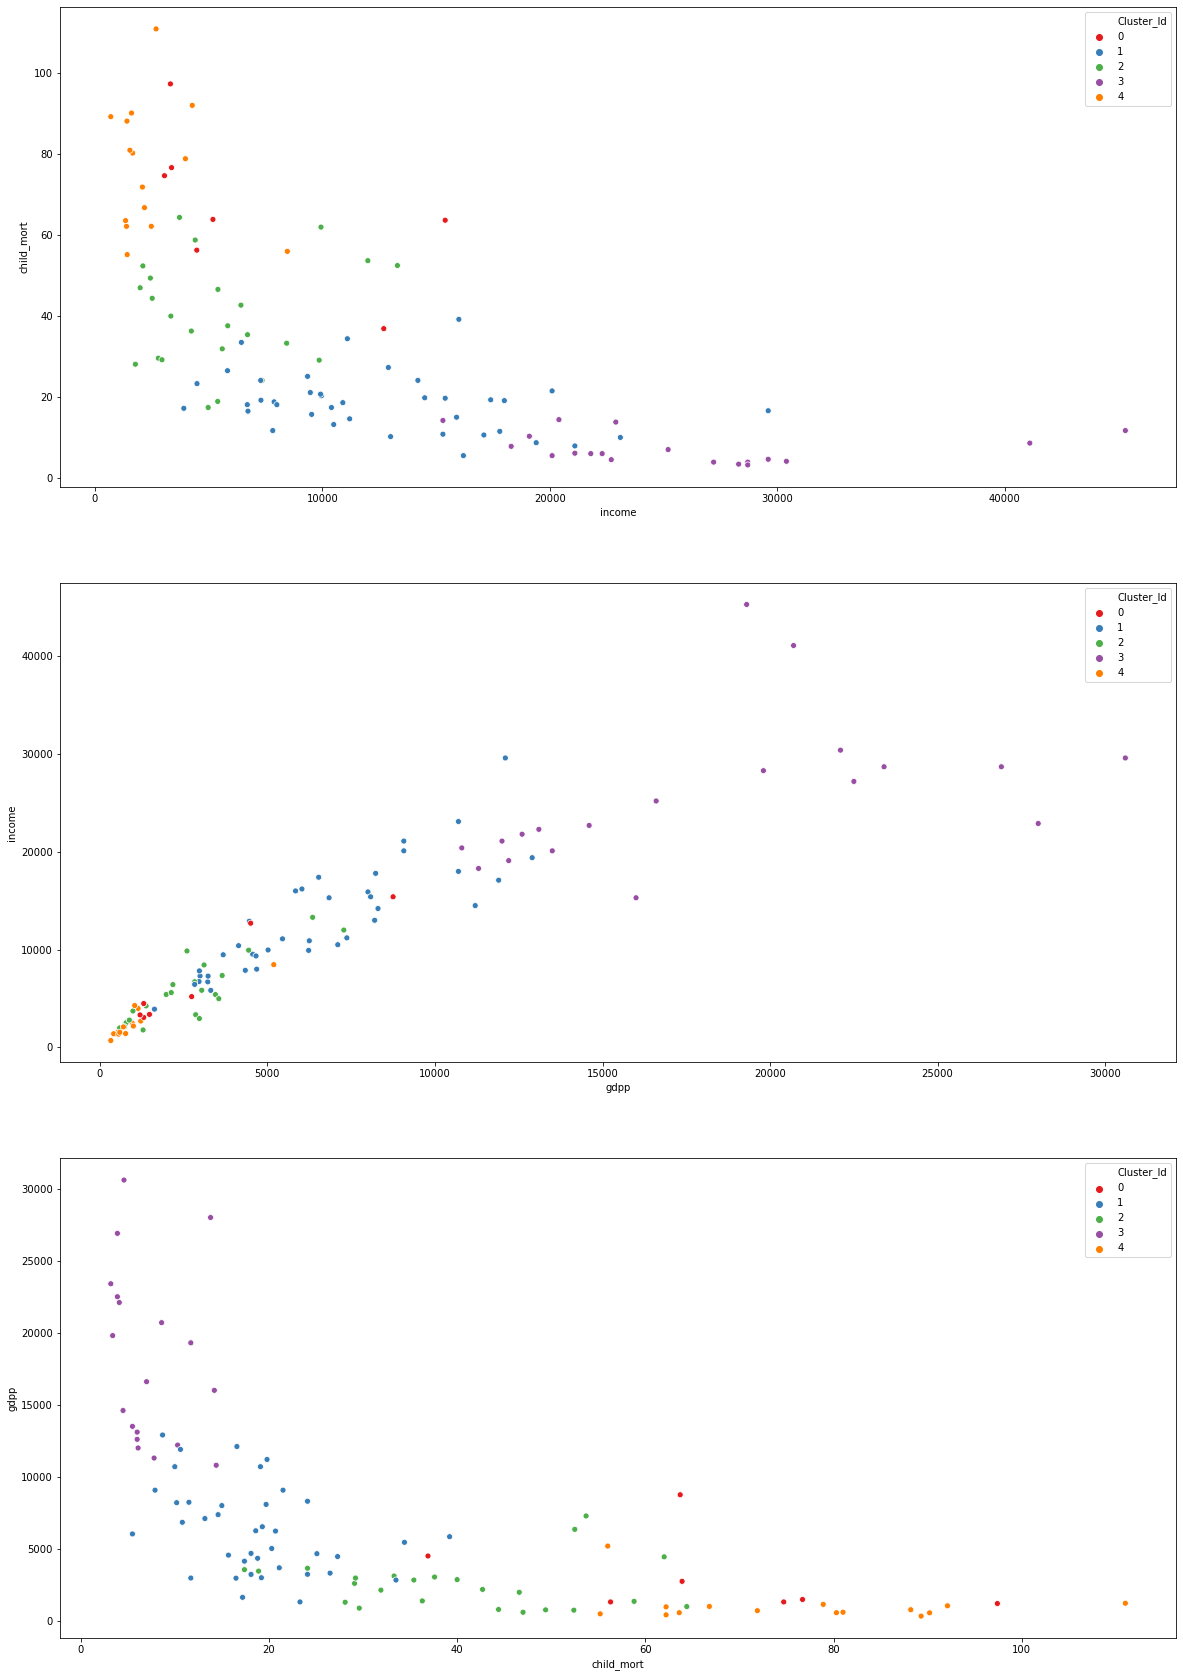

In [84]:
# Scatter plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1")
plt.show()

We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid

# FINAL ANALYSIS

In [85]:
df_clus0 = df_merge_col[df_merge_col['Cluster_Id'] ==0]
df_clus0.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
22,"Congo, Rep.",63.9,2331.74,1498.78,67.404,5190,20.7,60.4,4.95,2740,0
34,Gabon,63.7,5048.75,1653.75,306.250,15400,16.6,62.9,4.08,8750,0
37,Ghana,74.7,386.45,601.29,68.382,3060,16.6,62.2,4.27,1310,0
46,Iraq,36.9,1773.00,1534.50,378.450,12700,16.6,67.2,4.56,4500,0
61,Mauritania,97.4,608.40,734.40,52.920,3320,18.9,68.2,4.98,1200,0


In [86]:
df_clus4 = df_merge_col[df_merge_col['Cluster_Id'] ==4]
df_clus4.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,4
21,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,4
24,Cote d'Ivoire,111.0,617.3200,528.260,64.6600,2690,5.39,56.3,5.27,1220,4
31,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,4
35,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,4


In [87]:
df_append= df_clus0.append(df_clus4)
df_append.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
22,"Congo, Rep.",63.9,2331.74,1498.78,67.404,5190,20.7,60.4,4.95,2740,0
34,Gabon,63.7,5048.75,1653.75,306.250,15400,16.6,62.9,4.08,8750,0
37,Ghana,74.7,386.45,601.29,68.382,3060,16.6,62.2,4.27,1310,0
46,Iraq,36.9,1773.00,1534.50,378.450,12700,16.6,67.2,4.56,4500,0
61,Mauritania,97.4,608.40,734.40,52.920,3320,18.9,68.2,4.98,1200,0


In [88]:
print(df_clus0.shape,df_clus4.shape,df_append.shape)

(7, 11) (15, 11) (22, 11)


In [89]:
df_append.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,73.568182,714.976536,632.731636,89.008255,3852.727273,10.523636,62.595455,4.740455,1673.318182,2.727273
std,17.010988,1204.903497,724.981225,106.582167,3747.049864,6.687209,3.637173,0.713626,2016.718938,1.906925
min,36.900000,23.087800,112.306000,12.821200,700.000000,1.850000,56.200000,3.150000,327.000000,0.000000
25%,62.550000,109.158750,213.205000,39.418850,1557.500000,4.572500,60.500000,4.405000,571.000000,0.000000
50%,73.300000,224.584500,361.242500,53.264750,2585.000000,9.345000,62.850000,4.710000,1020.000000,4.000000
75%,86.400000,557.190000,591.472500,67.744500,4205.000000,16.600000,65.450000,5.050000,1310.000000,4.000000
max,111.000000,5048.750000,3150.330000,378.450000,15400.000000,23.600000,68.200000,6.150000,8750.000000,4.000000


In [90]:
# Based on final clusters information we are going to deduce the final list.
# We observed that mean child mortality is 54.67 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

df_final_list = data[data['child_mort']>55]
df_final_list.shape

(47, 10)

In [91]:
df_final_list.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231


In [92]:
# Let's check the demographic of the resultant data again

df_final_list.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,93.857447,821.899913,85.743751,727.775151,3518.361702,11.731596,59.661702,4.961489,1680.851064
std,32.242908,2283.329458,126.306474,1514.707514,5239.428061,15.553125,6.577120,1.108271,2765.543330
min,55.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.410000,231.000000
25%,64.150000,101.515500,31.962100,185.067000,1390.000000,3.715000,57.050000,4.440000,550.000000
50%,90.200000,180.404000,46.495000,302.802000,1870.000000,8.790000,60.400000,5.060000,897.000000
75%,111.000000,398.280000,68.120000,545.140000,3545.000000,16.350000,63.900000,5.635000,1330.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000


In [93]:
# We observed that mean income is 3518.36 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=3519]
df_final_list1.shape

(35, 10)

In [94]:
df_final_list1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310


In [95]:
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,98.720000,190.761400,56.936277,352.976029,1735.800000,8.491286,58.377143,5.252571,831.200000
std,32.886988,159.715094,56.727776,280.167208,769.189482,6.690649,6.957057,0.897743,606.557199
min,55.200000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,75.700000,80.351500,31.512200,170.534000,1215.000000,2.790000,56.250000,4.810000,470.500000
50%,90.500000,131.985000,41.917400,254.560000,1540.000000,6.390000,58.700000,5.210000,648.000000
75%,112.500000,224.584500,57.857500,400.286500,2135.000000,12.200000,62.000000,5.765000,1085.000000
max,208.000000,617.320000,328.320000,1190.510000,3370.000000,26.500000,71.100000,7.490000,3600.000000


In [96]:

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=832]
df_final_list2.shape

(23, 10)

In [97]:
df_final_list2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446


# Final List of countries which are in need of the aid based on socio-economic factors.

In [98]:
df_final_list2['country']

0      Afghanistan             
17     Benin                   
25     Burkina Faso            
26     Burundi                 
31     Central African Republic
36     Comoros                 
37     Congo, Dem. Rep.        
50     Eritrea                 
56     Gambia                  
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
106    Mozambique              
112    Niger                   
126    Rwanda                  
132    Sierra Leone            
147    Tanzania                
150    Togo                    
155    Uganda                  
Name: country, dtype: object

<Figure size 1080x360 with 0 Axes>

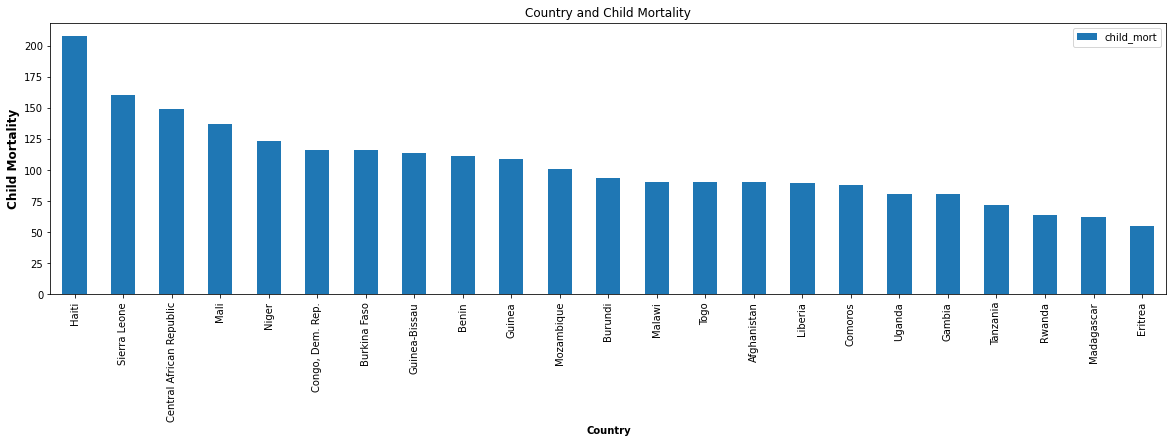

In [99]:
plt.figure(figsize=(15,5))
df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = True))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

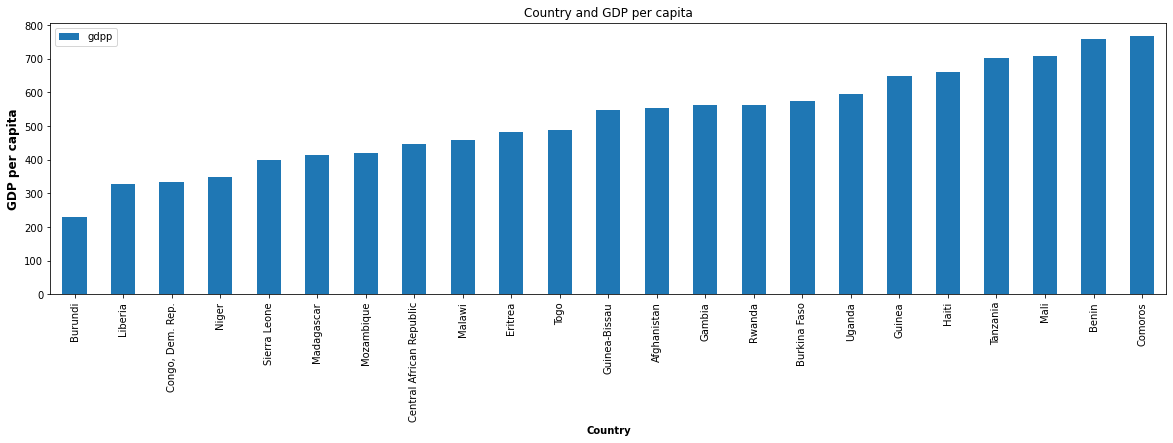

In [100]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Conclusion

We have used PCA above to reduce the variables involved and then done the clustering of countries based on those Principal components and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

In [101]:
# Final countries list
df_final_list2.reset_index(drop=True).country

0     Afghanistan             
1     Benin                   
2     Burkina Faso            
3     Burundi                 
4     Central African Republic
5     Comoros                 
6     Congo, Dem. Rep.        
7     Eritrea                 
8     Gambia                  
9     Guinea                  
10    Guinea-Bissau           
11    Haiti                   
12    Liberia                 
13    Madagascar              
14    Malawi                  
15    Mali                    
16    Mozambique              
17    Niger                   
18    Rwanda                  
19    Sierra Leone            
20    Tanzania                
21    Togo                    
22    Uganda                  
Name: country, dtype: object